In [ ]:
print(keras.__version__) 

In [ ]:
これより学習

In [1]:
%matplotlib inline
import numpy as np
from numpy import array, shape, dtype, expand_dims
import matplotlib.pyplot as plt

x_train,y_train,x_test,y_test = np.load("x1e5y5e4_50_2_plan_b.npy")
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

x_batch = 60000
y_batch = 10000
index1 = np.random.permutation(x_batch)
index2 = np.random.permutation(y_batch)
x_train,y_train = x_train[index1],y_train[index1]
x_test,y_test = x_test[index2],y_test[index2]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

import keras
one_hot = 10
y_train = keras.utils.np_utils.to_categorical(y_train, one_hot)
y_test = keras.utils.np_utils.to_categorical(y_test, one_hot)

(100000, 50, 50, 1) (100000,) (50000, 50, 50, 1) (50000,)
(60000, 50, 50, 1) (60000,) (10000, 50, 50, 1) (10000,)


/home/student/anaconda3/envs/keras2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

input_shape = x_train[0].shape
print(input_shape)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(one_hot, activation='softmax'))

(50, 50, 1)


In [3]:
from keras.optimizers import SGD
model.compile(loss="categorical_crossentropy",
              optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [4]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
batch_size = 100
epochs = 10
check = ModelCheckpoint("check_point.hdf5")
estop = EarlyStopping()
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test),callbacks=[check,estop])#

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1986s 33ms/step - loss: 0.0334 - acc: 0.9891 - val_loss: 4.4045 - val_acc: 0.3475
Epoch 2/10
60000/60000 [==============================] - 1980s 33ms/step - loss: 3.1408e-04 - acc: 0.9999 - val_loss: 4.9484 - val_acc: 0.2943


ValueError: x and y must have same first dimension, but have shapes (10,) and (2,)

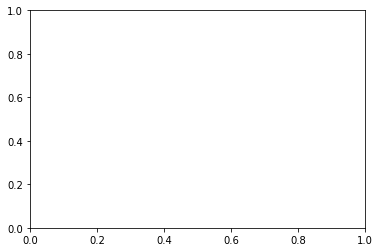

In [5]:
x = range(1,epochs+1)
#x = range(1,3)
#正答率
plt.plot(x,history.history['acc'])
plt.plot(x,history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(1,epochs+1))
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#loss
plt.plot(x,history.history['loss'])
plt.plot(x,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(1,epochs+1))
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
モデルの保存

In [7]:
model.save("plan_b_0113.h5")

In [ ]:
モデルの読み込み

In [1]:
from keras.models import load_model
model_plan_b = load_model("plan_b.h5")

/home/student/anaconda3/envs/keras2/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


作成したモデルをテスト

In [26]:
from PIL import Image
import numpy as np
from numpy import array

datalist = []
for i in range(10):
    a = './input/gray_28/g_%d.jpg' % (i)
    img = Image.open(a).convert('L')
    #img = img.resize((50, 50))
    img_arr = array(img)
    datalist.append(img_arr)
datalist = array(datalist)
datalist = np.expand_dims(datalist, axis=3)
print(datalist.shape, datalist.dtype)
datalist = 225 - datalist
#print(datalist[0])
datalilst = datalist.astype('float32')
datalist = datalist / 255
x = datalist
#x1 = np.expand_dims(datalist[0], axis=0)
#print(x1.shape)
y = model_plan_b.predict(x,batch_size=1,verbose=0)
print(np.argmax(y,axis=0))

(10, 28, 28, 1) uint8
[6 6 6 6 6 6 6 6 0 8]


In [ ]:
画素値を反転させて追加学習

In [8]:
%matplotlib inline
import numpy as np
from numpy import array, shape, dtype, expand_dims
import matplotlib.pyplot as plt

x_train,y_train,x_test,y_test = np.load("RDOTK.npy")
y_train = np.delete(y_train,-1,axis=0)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

x_batch = 60000
y_batch = 10000
index1 = np.random.permutation(x_batch)
index2 = np.random.permutation(y_batch)
x_train,y_train = x_train[index1],y_train[index1]
x_test,y_test = x_test[index2],y_test[index2]
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

x_train = 255 - x_train
x_test = 255 - x_test
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

import keras
one_hot = 10
y_train = keras.utils.np_utils.to_categorical(y_train, one_hot)
y_test = keras.utils.np_utils.to_categorical(y_test, one_hot)
x_train,x_test = np.expand_dims(x_train,axis=3),np.expand_dims(x_test,axis=3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(100000, 28, 28) (100000,) (100000, 28, 28) (100000,)
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [9]:
import keras
from keras.models import Sequential
from keras.models import load_model

model = Sequential()
model = load_model("plan_b.h5")

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size = 100
epochs = 18
check = EarlyStopping()
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test)) #,callbacks=[check]

Train on 60000 samples, validate on 10000 samples
Epoch 1/18
60000/60000 [==============================] - 417s 7ms/step - loss: 0.1305 - acc: 0.9666 - val_loss: 0.0829 - val_acc: 0.9771
Epoch 2/18
60000/60000 [==============================] - 415s 7ms/step - loss: 0.0327 - acc: 0.9889 - val_loss: 0.0977 - val_acc: 0.9745
Epoch 3/18
60000/60000 [==============================] - 416s 7ms/step - loss: 0.0220 - acc: 0.9928 - val_loss: 0.0976 - val_acc: 0.9734
Epoch 4/18
60000/60000 [==============================] - 430s 7ms/step - loss: 0.0155 - acc: 0.9950 - val_loss: 0.1210 - val_acc: 0.9707
Epoch 5/18
60000/60000 [==============================] - 432s 7ms/step - loss: 0.0132 - acc: 0.9957 - val_loss: 0.1254 - val_acc: 0.9673
Epoch 6/18
60000/60000 [==============================] - 431s 7ms/step - loss: 0.0098 - acc: 0.9966 - val_loss: 0.1168 - val_acc: 0.9705
Epoch 7/18
60000/60000 [==============================] - 428s 7ms/step - loss: 0.0072 - acc: 0.9979 - val_loss: 0.1425 - 

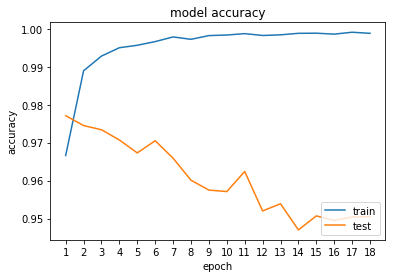

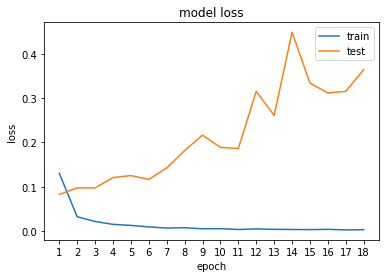

In [12]:
x = range(1,epochs+1)
#x = range(1,4)
#正答率
plt.plot(x,history.history['acc'])
plt.plot(x,history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(1,epochs+1))
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#loss
plt.plot(x,history.history['loss'])
plt.plot(x,history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(1,epochs+1))
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [11]:
model.save("plan_b_reverse.h5")